In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# check gpu
print(tf.config.list_physical_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1


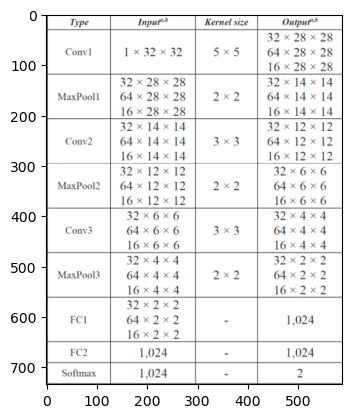

In [3]:
# https://ieeexplore.ieee.org/abstract/document/7440527

img = mpimg.imread('possible_model.png')
plt.imshow(img)
plt.show()

In [14]:
# physical layer functions

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from skimage.transform import resize

def normalize(img):
    if np.max(img) == 0:
        print('fail')
        return img, False
    img = img / np.max(img)
    img[img < 0.01] = 0
    img = resize(img, (225, 225))
    return img, True

# reduce resolution with conv
"""the size and number of detector elements, 
the size of the X-ray focal spot, and the
source-object-detector distances"""

lpf = np.ones(shape=(2, 2))
def low_res(img):
    img = sp.signal.convolve2d(img, lpf, mode='same') / lpf.size
    return img

# reduce contrast with norm function
"""voltage (intensity), detector sensitivity"""

def low_contrast(img, gamma=1.0):
    """gamma correction, gamma < 1 is less contrast"""
    res = np.power(img, gamma)
    res = (res - np.min(res)) / (np.max(res) - np.min(res))
    return res

In [5]:
# load data here
# before we run the models, we should have a way to save them so they don't have to be rerun
# train-test split method or another to get x_train, y_train, x_val, y_val

import os
import numpy as np

In [15]:
# Training

# Folder containing the files
training_path = "Train/Training Boxes"
training_labels_path = "Train/training_labels.txt"

with open(training_labels_path, 'r') as tl:
    training_labels = tl.readlines()
    training_labels = [x.strip().split(",") for x in training_labels]

training_dict = {}
for i in range(len(training_labels)):
    training_dict[training_labels[i][0]+','+training_labels[i][1]] = training_labels[i][2]


# List to store the arrays
training_array_RAW = np.array([])
training_array_LOW_RES = np.array([])
training_array_LOW_CONTRAST = np.array([])
training_array_COMBINED = np.array([])

training_labels_array = np.array([])

training_missed = 0

# Iterate through files in the folder
for filename in os.listdir(training_path):
    # Check if the file is a .npy file
    if filename[:-4] in training_dict:
        # Load the array from the file
        file_path = os.path.join(training_path, filename)
        array = np.load(file_path)

        # normalize to 225x225
        array, truth = normalize(array)
        if truth is False:
            print(filename)
            continue;

        training_array_RAW = np.concatenate((training_array_RAW, array), axis=None)

        # apply physical layers
        array_lr = low_res(array)
        training_array_LOW_RES = np.concatenate((training_array_LOW_RES, array_lr), axis=None)

        array_lc = low_contrast(array)
        training_array_LOW_CONTRAST = np.concatenate((training_array_LOW_CONTRAST, array_lc), axis=None)

        array_cb = low_contrast(array_lr)
        training_array_COMBINED = np.concatenate((training_array_COMBINED, array_cb), axis=None)

        # label
        lab = training_dict[filename[:-4]]
        if lab == 'ACTIONABLE' or lab == 'NORMAL':
            training_labels_array = np.concatenate((training_labels_array, 0), axis=None)
        elif lab == 'BENIGN':
            training_labels_array = np.concatenate((training_labels_array, 1), axis=None)
        elif lab == 'CANCER':
            training_labels_array = np.concatenate((training_labels_array, 2), axis=None)


    else:
        training_missed += 1

fail
DBT-P01302,rcc.npy


In [ ]:
plt.show()

In [30]:
# Validation

# Folder containing the files
validation_path = "Validation/Validation Boxes"
validation_labels_path = "Validation/validation_labels.txt"

with open(validation_labels_path, 'r') as tl:
    validation_labels = tl.readlines()
    validation_labels = [x.strip().split(",") for x in validation_labels]

validation_dict = {}
for i in range(len(validation_labels)):
    validation_dict[validation_labels[i][0]+','+validation_labels[i][1]] = validation_labels[i][2]


# List to store the arrays
validation_array_RAW = np.array([])
validation_array_LOW_RES = np.array([])
validation_array_LOW_CONTRAST = np.array([])
validation_array_COMBINED = np.array([])

validation_labels_array = np.array([])

validation_missed = 0

# Iterate through files in the folder
for filename in os.listdir(validation_path):
    # Check if the file is a .npy file
    if filename[:-4] in validation_dict:
        # Load the array from the file
        file_path = os.path.join(validation_path, filename)
        array = np.load(file_path)

        # normalize to 225x225
        array, truth = normalize(array)
        if truth is False:
            print(filename)
            continue;

        validation_array_RAW = np.concatenate((validation_array_RAW, array), axis=None)


        # apply physical layers
        array_lr = low_res(array)
        validation_array_LOW_RES = np.concatenate((validation_array_LOW_RES, array_lr), axis=None)

        array_lc = low_contrast(array)
        validation_array_LOW_CONTRAST = np.concatenate((validation_array_LOW_CONTRAST, array_lc), axis=None)

        array_cb = low_contrast(array_lr)
        validation_array_COMBINED = np.concatenate((validation_array_COMBINED, array_cb), axis=None)

        # label
        lab = validation_dict[filename[:-4]]
        if lab == 'ACTIONABLE' or lab == 'NORMAL':
            validation_labels_array = np.concatenate((validation_labels_array, 0), axis=None)
        elif lab == 'BENIGN':
            validation_labels_array = np.concatenate((validation_labels_array, 1), axis=None)
        elif lab == 'CANCER':
            validation_labels_array = np.concatenate((validation_labels_array, 2), axis=None)
    else:
        validation_missed += 1

In [31]:
# Testing

# Folder containing the files
test_path = "Test/Test Boxes"
test_labels_path = "Test/test_labels.txt"

with open(test_labels_path, 'r') as tl:
    test_labels = tl.readlines()
    test_labels = [x.strip().split(",") for x in test_labels]

test_dict = {}
for i in range(len(test_labels)):
    test_dict[test_labels[i][0]+','+test_labels[i][1]] = test_labels[i][2]


# List to store the arrays
test_array_RAW = np.array([])
test_array_LOW_RES = np.array([])
test_array_LOW_CONTRAST = np.array([])
test_array_COMBINED = np.array([])

test_labels_array = []

test_missed = 0

# Iterate through files in the folder
for filename in os.listdir(test_path):
    # Check if the file is a .npy file
    if filename[:-4] in test_dict:
        # Load the array from the file
        file_path = os.path.join(test_path, filename)
        array = np.load(file_path)

        # normalize to 225x225
        array, truth = normalize(array)
        if truth is False:
            print(filename)
            continue;

        test_array_RAW = np.concatenate((test_array_RAW, array), axis=None)


        # apply physical layers
        array_lr = low_res(array)
        test_array_LOW_RES = np.concatenate((test_array_LOW_RES, array_lr), axis=None)

        array_lc = low_contrast(array)
        test_array_LOW_CONTRAST = np.concatenate((test_array_LOW_CONTRAST, array_lc), axis=None)

        array_cb = low_contrast(array_lr)
        test_array_COMBINED = np.concatenate((test_array_COMBINED, array_cb), axis=None)

        # label
        lab = test_dict[filename[:-4]]
        if lab == 'ACTIONABLE' or lab == 'NORMAL':
            test_labels_array = np.concatenate((test_labels_array, 0), axis=None)
        elif lab == 'BENIGN':
            test_labels_array = np.concatenate((test_labels_array, 1), axis=None)
        elif lab == 'CANCER':
            test_labels_array = np.concatenate((test_labels_array, 2), axis=None)
    else:
        test_missed += 1

In [60]:
training_array_RAW = np.reshape(training_array_RAW, (-1, 225, 225))
training_array_LOW_RES = np.reshape(training_array_LOW_RES, (-1, 225, 225))
training_array_LOW_CONTRAST = np.reshape(training_array_LOW_CONTRAST, (-1, 225, 225))
training_array_COMBINED = np.reshape(training_array_COMBINED, (-1, 225, 225))

validation_array_RAW = np.reshape(validation_array_RAW, (-1, 225, 225))
validation_array_LOW_RES = np.reshape(validation_array_LOW_RES, (-1, 225, 225))
validation_array_LOW_CONTRAST = np.reshape(validation_array_LOW_CONTRAST, (-1, 225, 225))
validation_array_COMBINED = np.reshape(validation_array_COMBINED, (-1, 225, 225))

test_array_RAW = np.reshape(test_array_RAW, (-1, 225, 225))
test_array_LOW_RES = np.reshape(test_array_LOW_RES, (-1, 225, 225))
test_array_LOW_CONTRAST = np.reshape(test_array_LOW_CONTRAST, (-1, 225, 225))
test_array_COMBINED = np.reshape(test_array_COMBINED, (-1, 225, 225))

In [61]:
# sanity check

assert (training_missed == 0)
assert (validation_missed == 0)
assert (test_missed == 0)

(318, 225, 225)
(318, 225, 225)


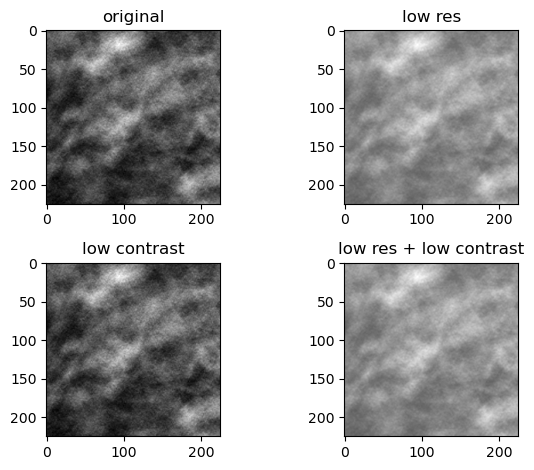

In [62]:
# sanity check images

fig, ax = plt.subplots(2, 2)
ax[0][0].set_title('original')
ax[0][0].imshow(test_array_RAW[0], cmap='gray')

ax[0][1].set_title('low res')
ax[0][1].imshow(test_array_LOW_RES[0], cmap='gray')

ax[1][0].set_title('low contrast')
ax[1][0].imshow(test_array_LOW_CONTRAST[0], cmap='gray')

ax[1][1].set_title('low res + low contrast')
ax[1][1].imshow(test_array_COMBINED[0], cmap='gray')
fig.tight_layout()
plt.show()

In [21]:
# saving

np.save('training_array_RAW', training_array_RAW)
np.save('training_array_LOW_RES', training_array_LOW_RES)
np.save('training_array_LOW_CONTRAST', training_array_LOW_CONTRAST)
np.save('training_array_COMBINED', training_array_COMBINED)

In [63]:
np.save('validation_array_RAW', validation_array_RAW)
np.save('validation_array_LOW_RES', validation_array_LOW_RES)
np.save('validation_array_LOW_CONTRAST', validation_array_LOW_CONTRAST)
np.save('validation_array_COMBINED', validation_array_COMBINED)

In [64]:
np.save('test_array_RAW', test_array_RAW)
np.save('test_array_LOW_RES', test_array_LOW_RES)
np.save('test_array_LOW_CONTRAST', test_array_LOW_CONTRAST)
np.save('test_array_COMBINED', training_array_COMBINED)

In [71]:
input_shape = (225, 225, 1)

model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.InputLayer(input_shape=input_shape),
    # convolution 1:
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    # tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    # max pooling layer 1:
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    # convolution 2:
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    # tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    # max pooling layer 2:
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    # convolution 3:
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    # tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    # max pooling layer 3:
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    # dense layer:
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=3, activation='softmax')
])


In [72]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # pick an optimizer
                     loss='sparse_categorical_crossentropy',  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 225, 225, 32)      832       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 32)        25632     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 32)      

In [70]:
print(training_labels_array)
print(training_array_RAW.shape)

[1. 1. 2. ... 1. 2. 2.]
(3180, 225, 225)


In [73]:
hist = model.fit(training_array_RAW, training_labels_array,
              epochs=10,
              batch_size=32,
              validation_data=(validation_array_RAW, validation_labels_array))

Epoch 1/10
100/100 [==============================] - 17s 77ms/step - loss: 0.2802 - accuracy: 0.9314 - val_loss: 0.6853 - val_accuracy: 0.8059
Epoch 2/10
100/100 [==============================] - 6s 60ms/step - loss: 0.2570 - accuracy: 0.9406 - val_loss: 0.5698 - val_accuracy: 0.8059
Epoch 3/10
100/100 [==============================] - 6s 60ms/step - loss: 0.2408 - accuracy: 0.9409 - val_loss: 0.5216 - val_accuracy: 0.8086
Epoch 4/10
100/100 [==============================] - 6s 61ms/step - loss: 0.1961 - accuracy: 0.9453 - val_loss: 0.6048 - val_accuracy: 0.8167
Epoch 5/10
100/100 [==============================] - 6s 60ms/step - loss: 0.1823 - accuracy: 0.9440 - val_loss: 0.5146 - val_accuracy: 0.8221
Epoch 6/10
100/100 [==============================] - 6s 60ms/step - loss: 0.1736 - accuracy: 0.9453 - val_loss: 0.6230 - val_accuracy: 0.8275
Epoch 7/10
100/100 [==============================] - 6s 60ms/step - loss: 0.1720 - accuracy: 0.9469 - val_loss: 0.5280 - val_accuracy: 0.835

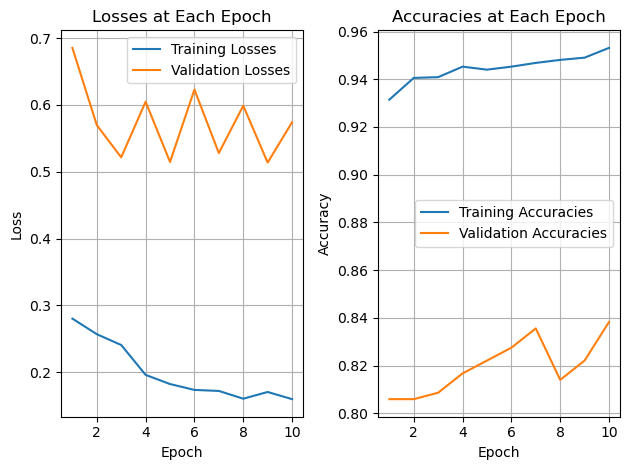

In [74]:
# TODO

# losses
plt.subplot(1,2,1)
plt.plot(np.arange(1,11,1), hist.history.get('loss'), label="Training Losses")
plt.plot(np.arange(1,11,1), hist.history.get('val_loss'), label="Validation Losses")
plt.grid(visible=True)
plt.title("Losses at Each Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

# accuracies
plt.subplot(1,2,2)
plt.plot(np.arange(1,11,1), hist.history.get('accuracy'), label="Training Accuracies")
plt.plot(np.arange(1,11,1), hist.history.get('val_accuracy'), label="Validation Accuracies")
plt.grid(visible=True)
plt.title("Accuracies at Each Epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()

# show plots
plt.tight_layout()
plt.show()